Simulation of Optimized Pricing Solution w/ Two Tiers and Correlated Demand Functions

In [18]:
# Import necessary modules
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# Known Data for the problem
Capacity = 200         # plane capacity (# of seats)
BookingLimit_SS = 120   # booking limit for SS class 

In [21]:
ItineraryData = pd.read_excel("BlueSky_Simulation_Data.xlsx", index_col=0, sheet_name = "Data")

In [22]:
print(ItineraryData)

                SS   FF
Demand_Mean    130   55
Demand_StdDev   45   20
Fare           350  850


In [32]:
def getRevenue (SuperSaver, FullFare, BookLimit):
    if SuperSaver <= BookLimit:
        SSRev=SuperSaver*ItineraryData['SS']['Fare']
        if FullFare > Capacity - SuperSaver:
            FFRev=(Capacity-SuperSaver)*ItineraryData['FF']['Fare']
        elif FullFare <= Capacity - SuperSaver:
            FFRev=FullFare*ItineraryData['FF']['Fare']
    elif SuperSaver > BookLimit:
        SSRev=BookLimit*ItineraryData['SS']['Fare']
        if FullFare > Capacity - BookLimit:
            FFRev=(Capacity-BookLimit)*ItineraryData['FF']['Fare']
        elif FullFare <= Capacity - BookLimit:
            FFRev=FullFare*ItineraryData['FF']['Fare']
    TotalRevenue = SSRev + FFRev
    return TotalRevenue

getRevenue(120,80,BookingLimit_SS)

110000

In [35]:
#predict revenues when booking limit is set to 120
NumTrials = 10000
ExampleHolder = np.zeros(NumTrials)
for i in range(len(ExampleHolder)):
    SSList = np.random.normal(ItineraryData['SS']['Demand_Mean'], ItineraryData['SS']['Demand_StdDev']) 
    FFList = np.random.normal(ItineraryData['FF']['Demand_Mean'], ItineraryData['FF']['Demand_StdDev'])
    ExampleHolder[i] = getRevenue(SSList,FFList,BookingLimit_SS)
print(np.average(ExampleHolder))

83164.87330887193


83440.48123278828
17639.267872176082


Text(0, 0.5, 'Number of Occurences')

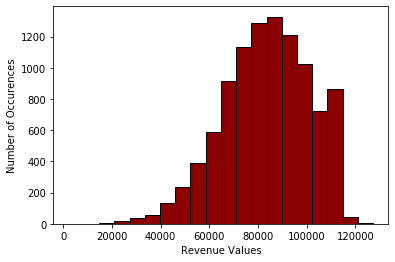

In [70]:
#predict revenues SS changed to 130,45 and FF changed to 55,20, get STD and plot a histogram
NumTrials = 10000
ExampleHolder = np.zeros(NumTrials)
for i in range(len(ExampleHolder)):
    SSList = np.random.normal(130,45) 
    FFList = np.random.normal(55,20)
    ExampleHolder[i] = getRevenue(SSList,FFList,BookingLimit_SS)
print(np.average(ExampleHolder))
print(np.std(ExampleHolder))
plt.hist(ExampleHolder, bins=20, color = "darkred", edgecolor="black")
plt.xlabel("Revenue Values")
plt.ylabel("Number of Occurences")

In [49]:
#search through looking for the best booking limit doing a simulation at each stop
PotentialBookingLimits = [x * 1 for x in range(1, Capacity+1)] 
BestBookingLimit = 0 
BestRevenueVal = 0

for j in PotentialBookingLimits:
    NumTrials = 10000
    ExampleHolder = np.zeros(NumTrials)
    for i in range(len(ExampleHolder)):
        SSList = np.random.normal(130,45) 
        FFList = np.random.normal(55,20)
        ExampleHolder[i] = getRevenue(SSList,FFList,i)
    if np.average(ExampleHolder)>BestRevenueVal:
        BestBookingLimit = j
        BestRevenueVal = np.average(ExampleHolder)
print(BestBookingLimit)
print(BestRevenueVal)
        

86
81451.49740388195


In [50]:
#setting up the correlated example
Mean = [ ItineraryData["SS"]["Demand_Mean"], ItineraryData["FF"]["Demand_Mean"] ]

corr = 0.6

CovMatrix = [[ItineraryData["SS"]["Demand_StdDev"]**2 , ItineraryData["SS"]["Demand_StdDev"]*ItineraryData["FF"]["Demand_StdDev"]*corr], 
             [ItineraryData["SS"]["Demand_StdDev"]*ItineraryData["FF"]["Demand_StdDev"]*corr,  ItineraryData["FF"]["Demand_StdDev"]**2]] 

In [64]:
#check matrix functioning...
Demands = multivariate_normal(Mean, CovMatrix, 1000).T
print(Demands[0]) #print the first element of the array.... SuperSaver Demand rand (correlated)
print(Demands[0,0]) #prints the first value in the first element in the series of 1000
print(Demands[1]) #print the second elment of the array... FullFare Demand rand (correlated)
print(Demands[1,1]) #prints the second value in the second element in the series of 1000

[192.19714424  77.65813139 124.98299581  67.98408906 159.6493853
 177.57139191 104.23795839  87.39893231 174.95130927  77.34573741
 134.16183678  47.24599602 156.32705465 184.9161674  127.75564382
  75.190755   166.1054037  105.1907258   54.25566892 140.90484509
 144.52456125 151.23851434  91.40684896 210.15055923 101.28799715
 203.40350143 120.17245969 108.62566159  67.58380648 133.68982104
 191.34628371 124.66013255 111.45040019 134.2987976   75.16589133
 147.23218889 124.27231299 143.01688609  97.89944776 165.1502349
  51.41469797 108.58962147 112.46421687  97.71516696 152.22259072
 107.51922266 128.95814235 183.92102985 222.53463671 197.93777994
 156.50712931 175.56711188 109.9158768   62.62749517 176.9296966
  91.12224078 158.99614222 138.30761237 166.49200355 144.81494769
  61.26381613 135.65607437  94.67390943 155.47209264 177.57195973
 173.56545823 126.53977787 129.58918198 164.63250259 184.47384002
 138.13934335  76.07738783  82.27962801 121.25990445  92.48712025
 204.87407381

In [66]:
#now go and implement the sucker 
NumTrials = 10000

CorrRandoArray = multivariate_normal(Mean,CovMatrix,NumTrials).T

ExampleHolder = np.zeros(NumTrials)
for i in range(len(ExampleHolder)):
    SSList = CorrRandoArray[0,i] 
    FFList = CorrRandoArray[1,i] 
    ExampleHolder[i] = getRevenue(SSList,FFList,BookingLimit_SS)
print(np.average(ExampleHolder))
print(np.std(ExampleHolder))

83104.59979427922
20758.484039288327
